In [53]:
# Import Lablleries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
# Load the Sentiment140 dataset
Twitter_dataset = pd.read_csv("E:\\Downloads\\Sentiment140.csv", encoding='ISO-8859-1', 
                              names=['target', 'ids', 'date', 'flag', 'user', 'text'])

# Dataset head
Twitter_dataset.head()

,target,ids,date,flag,user,text
0,1,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
1,1,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
2,1,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
4,1,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [55]:
# Shape of the dataset
Twitter_dataset.shape

(10000, 6)

In [56]:
# information of dataset
Twitter_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  10000 non-null  int64 
 1   ids     10000 non-null  int64 
 2   date    10000 non-null  object
 3   flag    10000 non-null  object
 4   user    10000 non-null  object
 5   text    10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [57]:
# see any null values are present in the dataset which is not good for the model building
Twitter_dataset.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [58]:
# Indentifing unique vlaues in the dataset
Twitter_dataset["target"].unique()

array([1, 0], dtype=int64)

In [59]:
# Numerifying unique entities in the 'target' column of dataset
Twitter_dataset["target"].value_counts()

1    5000
0    5000
Name: target, dtype: int64

In [60]:
# Replace entity 4 with 1
Twitter_dataset["target"] = Twitter_dataset["target"].replace(4, 1)

In [61]:
# Checking entity 4 has changed with 1 or not
Twitter_dataset["target"].unique()

array([1, 0], dtype=int64)

In [62]:
# Checking the head of dataset
Twitter_dataset.head()

,target,ids,date,flag,user,text
0,1,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
1,1,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
2,1,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
4,1,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [63]:
# Cleaning "text" column by removing special characters
import nltk
st = nltk.PorterStemmer()
lm = nltk.WordNetLemmatizer()
from nltk.corpus import stopwords
import string

# Define stopwords
stop_words = set(stopwords.words('english'))
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def clean_text(text):
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove '@name' mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    
    # Remove URLs
    text = re.sub(r'((www.[^s]+)|(https?://[^s]+))', ' ', text)
    
    # Remove numbers
    text = re.sub(r'[0-9]+', '', text)
    
    # Remove punctuation
    translator = str.maketrans('', '', punctuations_list)
    text = text.translate(translator)
    
    # Applying lemmatizer
    text = [lm.lemmatize(word) for word in text.split()]
    
    # Applying stemming and removing stopwords
    text = [st.stem(word) for word in text if word.lower() not in stop_words]
    
    # Remove stopwords
    text = " ".join(text)
    
          
    return text


# Apply the cleaning function to 'text' column
Twitter_dataset['cleaned_text'] = Twitter_dataset['text'].apply(lambda x: clean_text(x))
Twitter_dataset['cleaned_text'].head()

0                                    love u guy r best
1        im meet one besti tonight cant wait girl talk
2    thank twitter add sunisa got meet hin show dc ...
3    sick realli cheap hurt much eat real food plu ...
4                                    ha effect everyon
Name: cleaned_text, dtype: object

In [64]:
# Assigning X values to "target" column and Y = values to "Text" column
Y = Twitter_dataset['target']
X = Twitter_dataset['cleaned_text']

In [65]:
# Print X and Y values
print(X)
print(Y)

0                                       love u guy r best
1           im meet one besti tonight cant wait girl talk
2       thank twitter add sunisa got meet hin show dc ...
3       sick realli cheap hurt much eat real food plu ...
4                                       ha effect everyon
                              ...                        
9995                                  friend broke promis
9996                                      fine thank tire
9997                           tri keep eye opendamn bake
9998                                            hell snow
9999    gisburn great nice littl singl track tri new b...
Name: cleaned_text, Length: 10000, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: target, Length: 10000, dtype: int64


In [66]:
# Splitting Data Into Train and Test Subsets
from sklearn.model_selection import train_test_split 
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y, random_state =20)

In [67]:
# Checking shape of training and testing data
print(X.shape, X_train.shape, X_test.shape)

(10000,) (8000,) (2000,)


In [68]:
# Transforming the Dataset Using TF-IDF Vectorizer
# Fit the TF-IDF Vectorizer
# Using embedding technique to converting the word to vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [69]:
# Checking traing and test data 
print(X_train)
print(X_test)

  (0, 2113)	0.3692046151584821
  (0, 5665)	0.3502741832265488
  (0, 1466)	0.3826359703643488
  (0, 2312)	0.19741727740983456
  (0, 616)	0.24086474830381494
  (0, 7227)	0.3398560147461265
  (0, 8105)	0.30907702968808565
  (0, 1858)	0.35878644667805976
  (0, 4123)	0.15790057343415645
  (0, 4990)	0.30907702968808565
  (0, 8750)	0.19333033328262275
  (1, 565)	0.28987129984902194
  (1, 9728)	0.30113797629793115
  (1, 4952)	0.21190376883934461
  (1, 2819)	0.45550101377398095
  (1, 2983)	0.41208132126125785
  (1, 7501)	0.3410408079942464
  (1, 4328)	0.5355243410973864
  (2, 2336)	0.293963460490253
  (2, 8834)	0.20235781054769186
  (2, 7415)	0.22074460994176484
  (2, 8726)	0.27201792577602135
  (2, 3299)	0.15469399618915772
  (2, 8635)	0.3367569666721745
  (2, 8671)	0.2050443985765353
  :	:
  (7997, 9322)	0.37367110124225594
  (7997, 9300)	0.2983475987466222
  (7997, 2980)	0.30601218680882114
  (7997, 121)	0.3153928844599081
  (7997, 5948)	0.23511791892887646
  (7997, 5163)	0.24065734745315928

Training the Machine Learning Model

Model 1 = Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Logistic_model = LogisticRegression(max_iter = 1000)
Logistic_model.fit(X_train, y_train)

# Model Evaluation
# Training data evaluation
Y_train_predict = Logistic_model.predict(X_train)
Training_data_accuracy = accuracy_score(y_train, Y_train_predict)

print('Accuracy Score of the Training data: ', Training_data_accuracy)

Accuracy Score of the Training data:  0.85625


In [71]:
Y_train_predict

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [72]:
# Test data evaluation
Y_test_predict = Logistic_model.predict(X_test)
Testing_data_accuracy = accuracy_score(y_test, Y_test_predict)

print('Accuracy Score of the testing data: ', Testing_data_accuracy)

Accuracy Score of the testing data:  0.7385


In [43]:
Y_test_predict

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def model_Evaluate(model):
# Training data evaluation
    Y_train_predict = model.predict(X_train)
    
# Testing data evaluation
    Y_test_predict = model.predict(X_test)
    
# Print the evaluation metrics for the dataset
  #print(classification_report(y_test, Y_test_predict))
    
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, Y_test_predict)
    
  #categories = ['Negative','Positive']
  #group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  #group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  #labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  #sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  #xticklabels = categories, yticklabels = categories)
  #plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  #plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  #plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

 # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Compute evaluation metrics
    #report = classification_report(y_test, Y_test_predict)
    report_dict = classification_report(y_test, Y_test_predict, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    
    return report_df
    

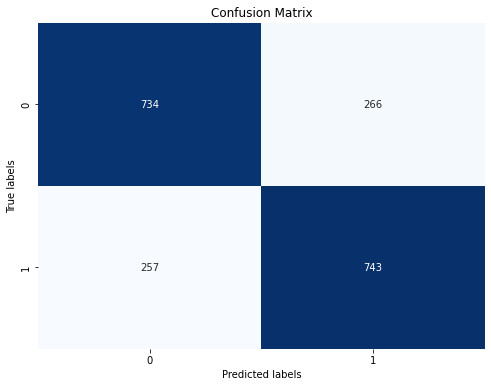

,precision,recall,f1-score,support
0,0.740666,0.7340,0.737318,1000.0000
1,0.736373,0.7430,0.739671,1000.0000
accuracy,0.738500,0.7385,0.738500,0.7385
macro avg,0.738519,0.7385,0.738495,2000.0000
weighted avg,0.738519,0.7385,0.738495,2000.0000


In [45]:
model_Evaluate(Logistic_model)

Model 2 = Bernoulli Naive Bayes Classifier

Accuracy Score of the Training data:  0.880625
Accuracy Score of the testing data:  0.7255


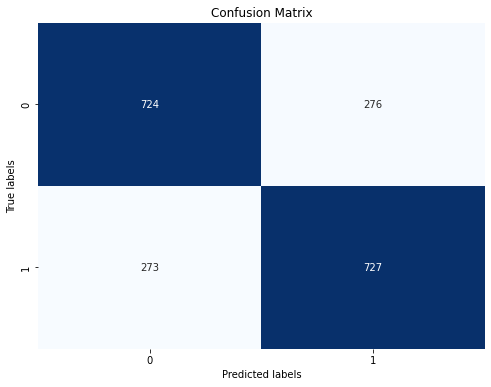

,precision,recall,f1-score,support
0,0.726179,0.7240,0.725088,1000.0000
1,0.724826,0.7270,0.725911,1000.0000
accuracy,0.725500,0.7255,0.725500,0.7255
macro avg,0.725502,0.7255,0.725499,2000.0000
weighted avg,0.725502,0.7255,0.725499,2000.0000


In [51]:
# import lableries
from sklearn.naive_bayes import BernoulliNB
BNB_model = BernoulliNB()
BNB_model.fit(X_train, y_train)

# Model Evaluation
# Training data evaluation
Y_train_predict = BNB_model.predict(X_train)
Training_data_accuracy = accuracy_score(y_train, Y_train_predict)

print('Accuracy Score of the Training data: ', Training_data_accuracy)

# Test data evaluation
Y_test_predict = BNB_model.predict(X_test)
Testing_data_accuracy = accuracy_score(y_test, Y_test_predict)

print('Accuracy Score of the testing data: ', Testing_data_accuracy)

model_Evaluate(BNB_model)

Model 3 = SVM (Support Vector Machine)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score of the Training data:  0.950375
Accuracy Score of the testing data:  0.7205


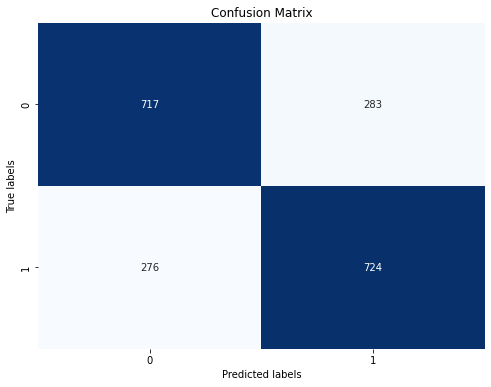

,precision,recall,f1-score,support
0,0.722054,0.7170,0.719518,1000.0000
1,0.718967,0.7240,0.721475,1000.0000
accuracy,0.720500,0.7205,0.720500,0.7205
macro avg,0.720511,0.7205,0.720497,2000.0000
weighted avg,0.720511,0.7205,0.720497,2000.0000


In [52]:
# import lableries
from sklearn.svm import LinearSVC
SVC_model = LinearSVC()
SVC_model.fit(X_train, y_train)

# Model Evaluation
# Training data evaluation
Y_train_predict = SVC_model.predict(X_train)
Training_data_accuracy = accuracy_score(y_train, Y_train_predict)

print('Accuracy Score of the Training data: ', Training_data_accuracy)

# Test data evaluation
Y_test_predict = SVC_model.predict(X_test)
Testing_data_accuracy = accuracy_score(y_test, Y_test_predict)

print('Accuracy Score of the testing data: ', Testing_data_accuracy)

model_Evaluate(SVC_model)